## This notebook is for optimization practice from ECE-505
##### Examples are taken from youtuber Siraj Raval : https://github.com/llSourcell/The_evolution_of_gradient_descent/blob/master/GD_vs_SGD.ipynb

### Gradient Descent method

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
import time

In [2]:
# Create function

#f = lambda x: x**3-2*x**2+2
f = lambda x: x**2-2*x+2

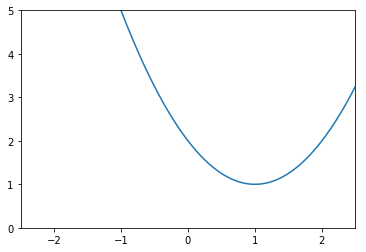

In [3]:
# Plot for values of x
x = np.linspace(-2.5,2.5,10000)
plt.plot(x,f(x))
plt.xlim([-2.5,2.5])
plt.ylim([0,5])
plt.show()

# From the graph local min is approx at (1.5,0.9)

In [4]:
g = 1
f = lambda x: x**2-2*x+2

precision = 0.0001
alp = 0.1
xold = 0
xnew = 2
xlist, ylist = [xnew], [f(xnew)]

def f_prime(x):
    #return 3*x**2-4*x
    return 2*x - 2

# Calculate runtime
starttime = time.time()

# Formula for gradint descent
while abs(xnew - xold) > precision:
   # print("Precision:", abs(xnew-xold))
    xold = xnew
    direc = -1*f_prime(xold)
    xnew = xold + alp*direc
    xlist.append(xnew)
    ylist.append(f(xnew))

runtime = time.time() - starttime
    
    
print ("Local minimum occurs at:", xnew)
print ("Number of steps:", len(xlist))
print ("runtime: ", runtime)


Local minimum occurs at: 1.0003245185536584
Number of steps: 37
runtime:  0.0020017623901367188


In [26]:
print(xlist)
print(ylist)

[2, 1.6, 1.472, 1.4107648, 1.377993523724288, 1.3595310877861793, 1.3488460893035294, 1.3425687932361137, 1.3388490211591169, 1.336633619185146, 1.3353102372784098, 1.3345183032556167, 1.3340438940405883, 1.3337595182887307, 1.333588989816487, 1.3334867076151544, 1.3334253508453249]
[2, 0.976, 0.8559380480000001, 0.8272703294568053, 0.8188929562322413, 0.8162054395956542, 0.8152998390868302, 0.814986189980774, 0.8148758282419326, 0.8148366345345619, 0.8148226388392663, 0.8148176247861283, 0.8148158249666122, 0.8148151781594568, 0.8148149455519995, 0.8148148618657634, 0.8148148317500392]


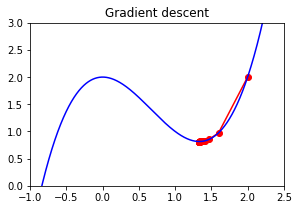

In [34]:
# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(xlist,ylist,c="r")

plt.plot(xlist,ylist,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent")

In [46]:
# step size was constant. Let's use variable step size using scipy
# Minimize a function using the downhill simplex algorithm.
from scipy import stats
from scipy.optimize import fmin
#help(fmin)

# we setup this function to pass into the fmin algorithm
def f2(n,x,s):
    x = x + n*s
    return f(x)

xold = 0
xnew = 2 # The algorithm starts at x=2
precision = 0.0001

xlist, ylist = [xnew], [f(xnew)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

# Calculate runtime
starttime = time.time()

while abs(xnew - xold) > precision:
    xold = xnew
    direc = -1*f_prime(xold)
    
    # use scipy fmin function to find ideal step size.
    alp = fmin(f2,0.1,(xold,direc), full_output = False, disp = False)

    xnew = xold + alp * direc
    xlist.append(xnew)
    ylist.append(f(xnew))

runtime = time.time() - starttime    
    
print ("Local minimum occurs at ", float(xnew))
print ("Number of steps:", len(xlist))
print ("runtime: ", runtime)


Local minimum occurs at  1.3333333284505209
Number of steps: 4
runtime:  0.01200103759765625


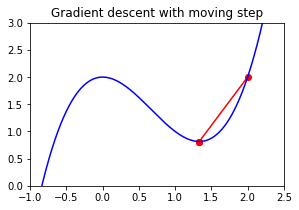

In [42]:
# We see it converges quickly in lesser steps but time consumed is higher ofcourse

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(xlist,ylist,c="r")

plt.plot(xlist,ylist,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent with moving step")

In [2]:
# Newton's method
f = lambda x1,x2: 5*x1**4 + 6*x2**4 - 6*x1**2 + 2*x1*x2 + 5*x2**2 + 15*x1 -7*x2 + 13

precision = 0.0001
xold = np.matrix('0;0')
xnew = np.matrix('1;1')
xlist, ylist = [xnew], [f(xnew)]

def f_prime(x1, x2):
    return np.matrix('(20*x1**3)-(12*x1)+(2*x2)+15;(24*x2**3)+(2*x1)+(10*x2)-7')

def f_primeprime(x1, x2):
    return np.matrix('((60*x1**2)-12) (2); (2) ((72*x2**2)+10)')

# Calculate runtime
starttime = time.time()

# Formula for gradint descent
while abs(xnew - xold) > precision:
   # print("Precision:", abs(xnew-xold))
    xold = xnew
    direc = -1*np.linalg.inv(f_primeprime(xold))*f_prime(xold)
    xnew = xold + direc
    xlist.append(xnew)
    ylist.append(f(xnew))

runtime = time.time() - starttime
    
    
print ("Local minimum occurs at:", xnew)
print ("Number of steps:", len(xlist))
print ("runtime: ", runtime)

SyntaxError: invalid syntax (<ipython-input-2-5898a5500931>, line 2)

In [21]:
# Newton's method
f = lambda x1,x2: 5*x1**4 + 6*x2**4 - 6*x1**2 + 2*x1*x2 + 5*x2**2 + 15*x1 -7*x2 + 13

def f_prime(x1, x2):
    return np.matrix('20*x1**3-12*x1+2*x2+15;24*x2**3+2*x1+10*x2-7')

def f_primeprime(x1, x2):
    return np.matrix('((60*x1**2)-12) (2); (2) ((72*x2**2)+10)')

xold = np.matrix('1;1')
#xnew = np.matrix('1;1')

direc = -1* np.linalg.inv(f_primeprime(1,1)) * f_prime(1,1)
xnew = xold + direc
    
print ("xnew", xnew)

xnew [[ 0.678617  ]
 [ 0.64901034]]


In [49]:
x1 = -1.1421
x2 = 0.5433
fprime1 = 20*x1**3-12*x1+2*x2+15
fprime2 = 24*x2**3+2*x1+10*x2-7

fprimeprime11 = (60*x1**2)-12
fprimeprime22 = (72*x2**2)+10

print("fprime:"); print(fprime1); print(fprime2)
print("\n")
print("fprimeprime:"); print(fprimeprime11); print(fprimeprime22)


fprime:
-0.0031314292199944305
-0.002355574312000286


fprimeprime:
66.26354459999999
31.252592080000003


In [50]:
x = np.matrix('-1.1421; 0.5433')

b = np.matrix('-0.0031; -0.0023')  #prime

a = np.matrix('66.2635 2; 2 31.2525')  #prime prime
print("xnew",x - (np.linalg.inv(a) * b))

xnew [[-1.14205535]
 [ 0.54337074]]


In [52]:
# Newton method in 2 dims

f = lambda x: x**4 - 1

precision = 0.0001
xold = 0
xnew = 4
xlist, ylist = [xnew], [f(xnew)]

def f_prime(x):
    return 2*x**3

def f_prime_prime(x):
    return 12*x**2

# Calculate runtime
starttime = time.time()

# Formula for gradint descent
while abs(xnew - xold) > precision:
   # print("Precision:", abs(xnew-xold))
    xold = xnew
    direc = (-1*f_prime(xold))/f_prime_prime(xold)
    xnew = xold + direc
    xlist.append(xnew)
    ylist.append(f(xnew))

runtime = time.time() - starttime
        
print ("Local minimum occurs at:", xnew)
print ("Number of steps:", len(xlist))
print ("runtime: ", runtime)


Local minimum occurs at: 0.00043953927646868873
Number of steps: 51
runtime:  0.001001119613647461


In [108]:
# Quasi Newton rank two update (BFGS)
# update b query
# x prime
oldx = np.matrix('-1.1592; 0; -1.0304')
newX = np.matrix('-2.0096; 0.9900; -0.9875')
q = np.matrix('5 2 1; 2 7 3; 1 3 9')
c = np.matrix('-9; 0; -8')
newdelfx = (q * newX) - c
olddelfx = (q * oldx) - c

# update b ~ x prime prime
y = newdelfx - olddelfx
s = newX - oldx
delB1 = ((-1 * (b * s) * np.transpose(b * s) / (np.transpose(s) * b * s)))
delB2 = ((y * np.transpose(y))/(np.transpose(y) * s))
b = np.matrix('2.9382 1.9786 3.3194; 1.9786 2.568 3.024; 3.3194 3.024 6.3906')
newb = b + (delB1 + delB2)

# find search dir
p = np.linalg.inv(newb) * newdelfx * -1

# find alpha line search
num = -1 * np.transpose(p) * newdelfx
den = np.transpose(p) * q * p
alpha = num/den
alpha = round(float(alpha),4)

# new x
newX = oldx + alpha * p

matrix([[-0.0555],
        [-0.0517],
        [ 0.0729]])

In [123]:
# Calculate here
np.linalg.norm((q * newX) - c)

0.0061973718471166677

In [ ]:
# Quasi Newton rank one update
# update b query
# x prime
oldx = np.matrix('-1.1592; 0; -1.0304')
newX = np.matrix('-2.0096; 0.9900; -0.9875')
q = np.matrix('5 2 1; 2 7 3; 1 3 9')
c = np.matrix('-9; 0; -8')
newdelfx = (q * newX) - c
olddelfx = (q * oldx) - c

# update b ~ x prime prime
y = newdelfx - olddelfx
s = newX - oldx
numB = (y - (b * s)) * np.transpose((y - (b * s)))
denB = np.transpose((y - (b * s))) * s
delB = numB * np.linalg.inv(denB)
b = np.matrix('2.9382 1.9786 3.3194; 1.9786 2.568 3.024; 3.3194 3.024 6.3906')
newb = b + (numB)

# find search dir
p = np.linalg.inv(newb) * newdelfx * -1

# find alpha line search
num = -1 * np.transpose(p) * newdelfx
den = np.transpose(p) * q * p
alpha = num/den
alpha = round(float(alpha),4)

# new x
newX = oldx + alpha * p

In [135]:
# Calculxate here
x1 = np.matrix('-1.1592; 0; -1.0304')
s = np.matrix('-1.1592; 0; -1.0304')
y = np.matrix('-6.8264; -5.4096; -10.4328')
b = np.identity(3)
numB = (y - (b * s)) * np.transpose((y - (b * s)))
denB = np.transpose((y - (b * s))) * s
#delB = numB * np.linalg.inv(denB)
delB = numB / round(float(denB),4)
delB

matrix([[ 1.97550427,  1.88570863,  3.27754118],
        [ 1.88570863,  1.7999946 ,  3.12856204],
        [ 3.27754118,  3.12856204,  5.43773878]])

In [136]:
b1 = b + delB
b1

matrix([[ 2.97550427,  1.88570863,  3.27754118],
        [ 1.88570863,  2.7999946 ,  3.12856204],
        [ 3.27754118,  3.12856204,  6.43773878]])

In [149]:
fx1 = (q * x1) - c
p = np.linalg.inv(b1) * fx1 * -1
num = -1 * np.transpose(p) * fx1
den = np.transpose(p) * q * p
alpha = num/den
alpha = round(float(alpha),4)
x2 = x1 + alpha * p
fx2 = (q * x2) - c

matrix([[-0.05640499],
        [-0.0506815 ],
        [ 0.07294835]])

In [163]:
s1 = x2 -x1
y1 = fx2 - fx1
numB = (y1 - (b1 * s1)) * np.transpose((y1 - (b1 * s1)))
denB = np.transpose((y1 - (b1 * s1))) * s1
delB = numB / round(float(denB),4)
delB
b2 = b1 + delB
b2

matrix([[ 3.50021121,  0.63857445,  2.68724504],
        [ 0.63857445,  5.76420861,  4.53158998],
        [ 2.68724504,  4.53158998,  7.10182288]])

In [169]:
p2 = np.linalg.inv(b2) * fx2 * -1
num = -1 * np.transpose(p2) * fx2
den = np.transpose(p2) * q * p2
alpha = num/den
alpha = round(float(alpha),4)
x3 = x2 + alpha * p2
fx3 = (q * x3) - c
fx3
np.linalg.norm(fx3)

0.0061902354606925862

In [177]:
s2 = x3 -x2
y2 = fx3 - fx2
numB = (y2 - (b2 * s2)) * np.transpose((y2 - (b2 * s2)))
denB = np.transpose((y2 - (b2 * s2))) * s2
delB = numB / round(float(denB),4)
delB
b3 = b2 + delB
b3

matrix([[ 5.00746408,  2.00676543,  0.99158545],
        [ 2.00676543,  7.00616779,  2.99237504],
        [ 0.99158545,  2.99237504,  9.00944004]])

In [180]:
p3 = np.linalg.inv(b3) * fx3 * -1
num = -1 * np.transpose(p3) * fx3
den = np.transpose(p3) * q * p3
alpha = num/den
alpha = round(float(alpha),4)
alpha
x4 = x3 + alpha * p3
x4

matrix([[-1.99999999],
        [ 1.00000001],
        [-1.00000001]])

In [182]:
fx4 = (q * x4) - c
fx4
#np.linalg.norm(fx4)

matrix([[  3.06675290e-08],
        [  3.23938907e-08],
        [ -5.49156347e-08]])

In [ ]:
# Conjugate Gradient Descent